In [47]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [7]:
# Read csv file
plane_data = pd.read_csv('Plane Crashes.csv')

In [10]:
plane_data_df = pd.DataFrame(plane_data)
plane_data_df.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


<Axes: title={'center': 'Crashes by Region'}, xlabel='Region'>

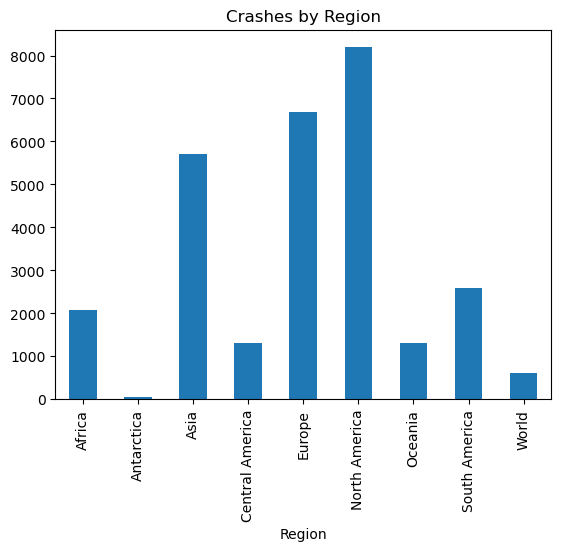

In [12]:
# Region bar graph
region = plane_data_df.groupby("Region").size()
region.plot(kind='bar', title='Crashes by Region')

<Axes: title={'center': 'Crashes by flight phase'}, xlabel='Flight phase'>

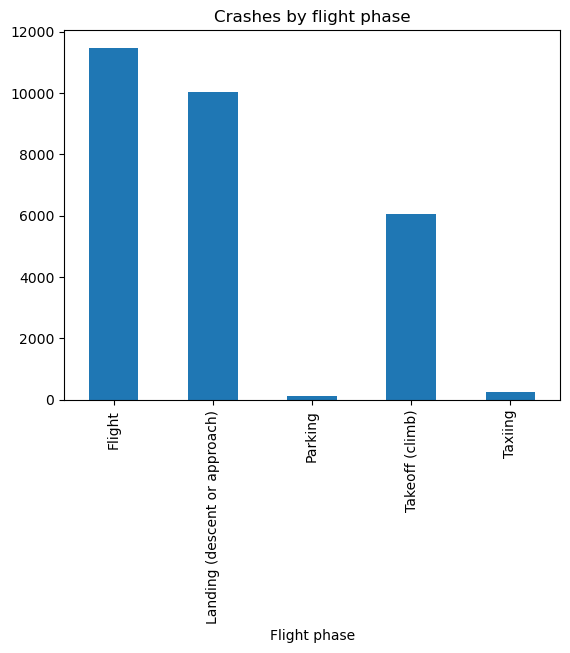

In [14]:
# Percentage of crash cause
flight_phase = plane_data_df.groupby("Flight phase").size()
flight_phase.plot(kind='bar', title='Crashes by flight phase')

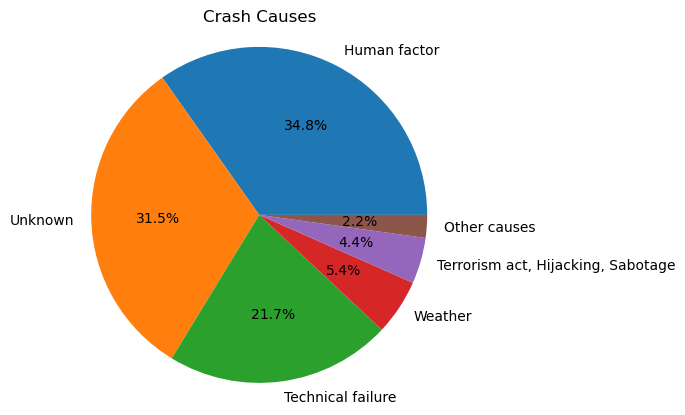

In [16]:
# Crash Cause
Crash_cause = plane_data_df['Crash cause'].value_counts()

plt.pie(Crash_cause, labels=Crash_cause.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Crash Causes')
plt.show()

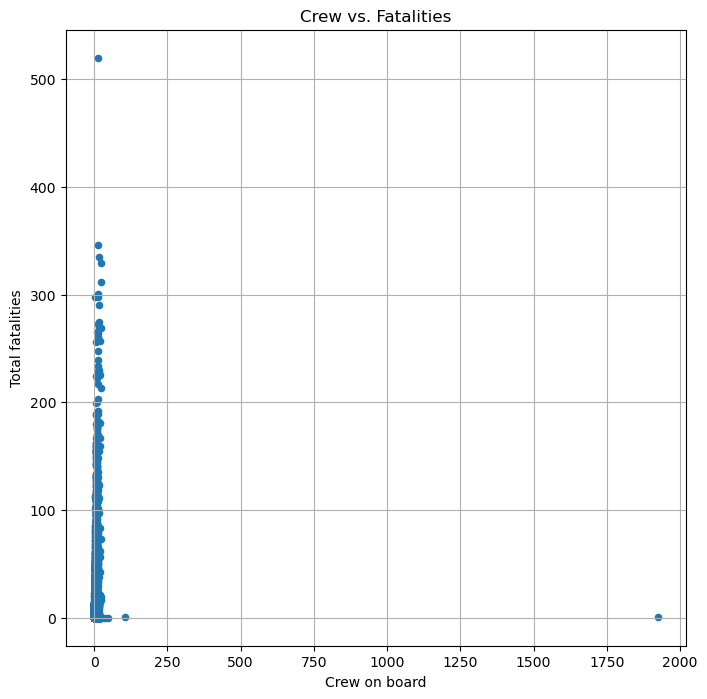

In [18]:
# Crew on board vs total fatalities scatter plot
plane_data_df.plot(kind='scatter', x='Crew on board', y='Total fatalities', grid='True', figsize=(8,8), title='Crew vs. Fatalities')
plt.show()

In [87]:
# Remove outliers from 'crew on board'
crew_data = plane_data_df.loc[plane_data_df['Crew on board'] < 30]
crew_data.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown


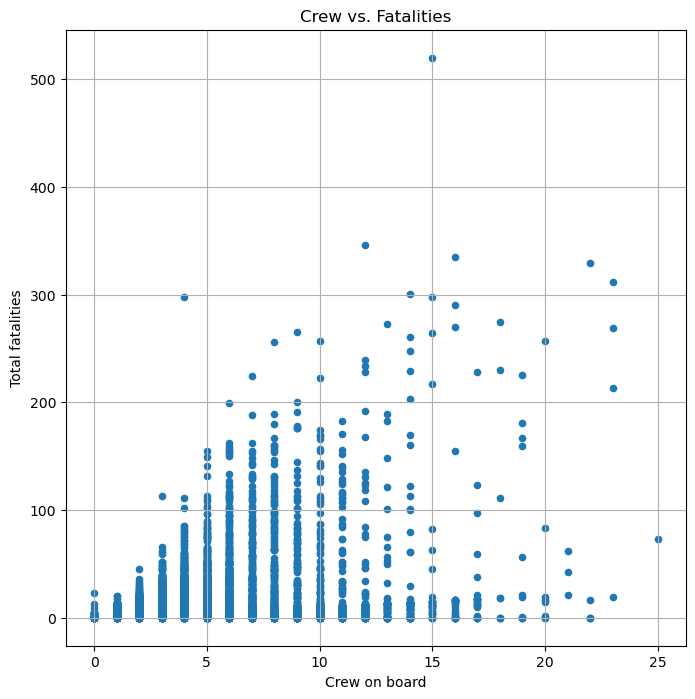

In [89]:
# Crew on board vs total fatalities scatter plot
crew_data.plot(kind='scatter', x='Crew on board', y='Total fatalities', grid='True', figsize=(8,8), title='Crew vs. Fatalities')
plt.show()

Correlation Coefficient: 0.37654740403231135


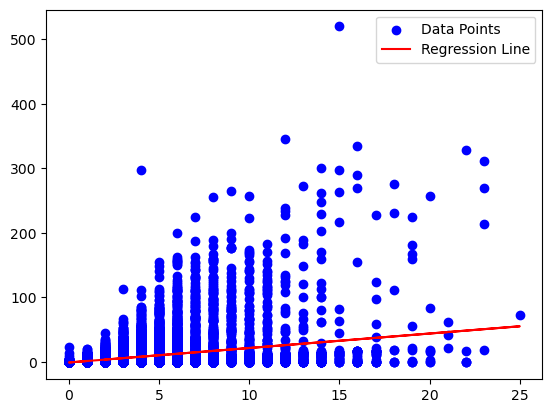

In [91]:
# Correlation and Regression
correlation = crew_data['Crew on board'].corr(crew_data['Total fatalities'])
print(f"Correlation Coefficient: {correlation}")

x = crew_data['Crew on board']
y = crew_data['Total fatalities']
slope, intercept, _, _, _ = linregress(x,y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')

plt.legend()
plt.show()

In [83]:
# Import second database
aircraft_data = pd.read_csv('baaa-aircraft-dataset.csv')

aircraft_df = pd.DataFrame(aircraft_data)
aircraft_df.head()

,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Year,Probable Causes
0,27-Apr-20,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0.0,1,1,Postal,Flight,Europe,1920,Unknown Reasons
1,15-Sep-23,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0.0,0,0,Scheduled Revenue Flight,Flight,Europe,1923,Technical Factors
2,24-Apr-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2.0,3,3,Scheduled Revenue Flight,Flight,Europe,1924,Technical Factors
3,21-Aug-24,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0.0,5,0,Private,Flight,North America,1924,Technical Factors
4,9-Feb-25,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0.0,2,0,Postal,Flight,Africa,1925,Technical Factors


In [27]:
# Total on board vs. plane accidents dataframe
data = {'plane_accidents': range(len(aircraft_df)), 
        'total_board': aircraft_df['Total on board']}
accidents_total_df = pd.DataFrame(data)
accidents_total_df.head()

,plane_accidents,total_board
0,0,1
1,1,0
2,2,3
3,3,5
4,4,2


In [59]:
plane_accidents = aircraft_df['Total on board'].value_counts()
print(plane_accidents)

Total on board
4      55
5      50
2      48
3      47
6      42
7      40
8      37
1      32
0      28
10     28
9      27
11     21
12     19
13     13
14     12
17      6
20      6
16      6
15      6
19      6
23      5
24      4
21      4
31      4
25      3
18      3
26      2
22      2
37      2
32      2
29      2
58      2
159     1
76      1
101     1
40      1
88      1
329     1
78      1
115     1
217     1
239     1
66      1
122     1
107     1
99      1
45      1
36      1
30      1
44      1
67      1
59      1
42      1
39      1
53      1
65      1
52      1
69      1
28      1
38      1
Name: count, dtype: int64


In [61]:
data = {'plane_accidents': plane_accidents, 
        'total_board': aircraft_df['Total on board']}
accidents_total_df = pd.DataFrame(data)
accidents_total_df.head()

,plane_accidents,total_board
0,28.0,1
1,32.0,0
2,48.0,3
3,47.0,5
4,55.0,2


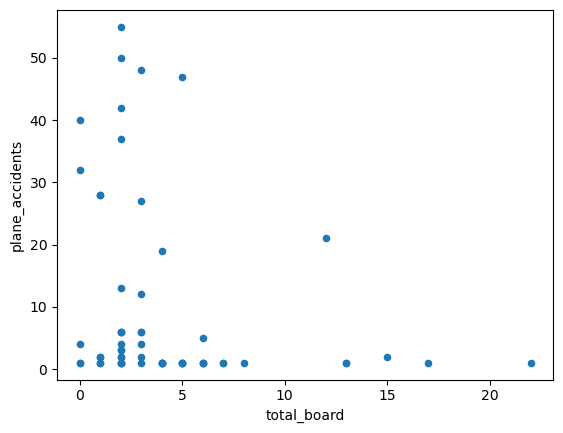

In [65]:
# total on board vs. plane accidents dataframe
accidents_total_df.plot.scatter(x='total_board', y='plane_accidents')
plt.show()

Correlation Coefficient: -0.22197630020056242


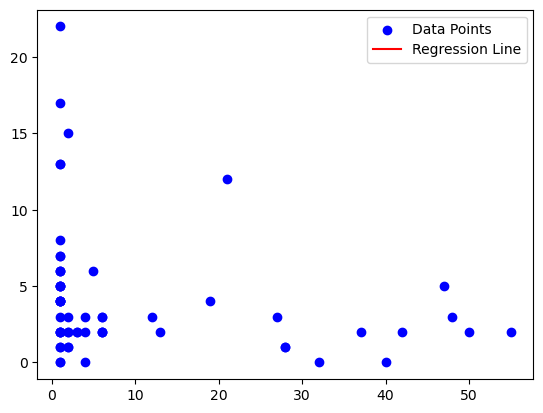

In [75]:
# Correlation and Regression
correlation = plane_accidents.corr(accidents_total_df['total_board'])
print(f"Correlation Coefficient: {correlation}")

x = accidents_total_df['plane_accidents']
y = accidents_total_df['total_board']
slope, intercept, _, _, _ = linregress(x,y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.xlabel=('Plane Accidents')
plt.ylabel=('Total on Board')
plt.legend()
plt.show()

In [31]:
# Total on board vs. fatalities dataframe
data_2 = {'Total on board': aircraft_df['Total on board'], 'Fatalities': aircraft_df['Total fatalities']}
board_fatalities_df = pd.DataFrame(data_2)
board_fatalities_df.head()

,Total on board,Fatalities
0,1,1
1,0,0
2,3,3
3,5,0
4,2,0


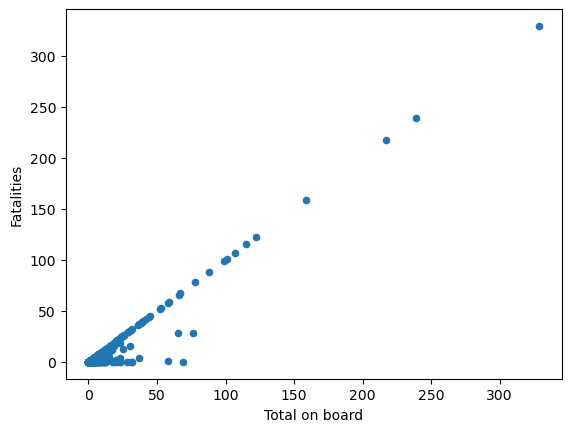

In [33]:
# Scatterplot for Total on board vs. fatalities dataframe
board_fatalities_df.plot.scatter(x='Total on board', y='Fatalities')
plt.show()

Correlation Coefficient: 0.9688737544433415


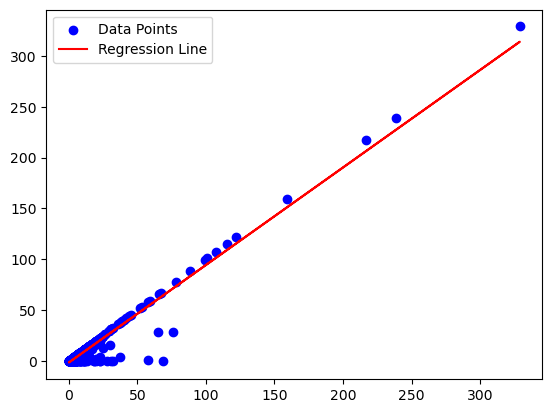

In [49]:
# Correlation and regression
correlation = board_fatalities_df['Total on board'].corr(board_fatalities_df['Fatalities'])
print(f"Correlation Coefficient: {correlation}")

x = board_fatalities_df['Total on board']
y = board_fatalities_df['Fatalities']
slope, intercept, _, _, _ = linregress(x,y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.xlabel=('Total on Board')
plt.ylabel=('Fatalities')
plt.legend()
plt.show()